Notebook 1 - Explore Results :
Après avoir concaténer le dataset, nous analysons les features de résultats (outputs) les plus appropriés, et dérivons le cas échéant en features de profil (inputs)

In [1]:
# vérifier le PEP8 style
%load_ext pycodestyle_magic
%flake8_on

1: E999 SyntaxError: invalid syntax


In [2]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Pour afficher tout le contenu d'une valeur
pd.set_option('display.max_colwidth', -1)
# Pour afficher toutes les colonnes
pd.options.display.max_columns = 100
%matplotlib inline

1: E999 SyntaxError: invalid syntax


In [3]:
# récupérer les données de l'étape précédente
dat = pd.read_csv('dat1.csv')

In [4]:
# vérifier visuellement les données (taille, nature)
print(dat.shape)
dat.tail(2)

(6539, 48)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Comments,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,Select_Default,Select_Outlier
6537,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare",Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.0,102248.0000,348870.1760,3706.010010,370601.0010,0.0,22.11,1.57,NaN,Compliant,NaN,47.52832,-122.32431,8319 8th Ave S,Seattle,WA,NaN,False,NaN
6538,50226,2016,Nonresidential COS,Mixed Use Property,Van Asselt Community Center,7857002030,2,GREATER DUWAMISH,1938,1.0,1.0,18258,0,18258,"Fitness Center/Health Club/Gym, Food Service, Office, Other - Recreation, Pre-school/Daycare",Other - Recreation,8271.0,Fitness Center/Health Club/Gym,8000.0,Pre-school/Daycare,1108.0,NaN,NaN,63.099998,70.900002,115.800003,123.900002,1.152896e+06,1.293722e+06,0.0,126774.3984,432554.2475,7203.419922,720341.9922,0.0,41.27,2.26,NaN,Compliant,NaN,47.53939,-122.29536,2820 S Myrtle St,Seattle,WA,NaN,False,NaN


## B. Analyse des Features

## B.1. Features de résultats (outputs)

On distingue les résultats totaux qui sont les objectifs possibles de l'étude (energie consommée et équivalent source, émissions de CO2), et les résultats détaillés, qui font partie des relevés et composent les résultats directs (chaque nature d'énergie) 

- les résultats totaux mesurant l'energie consommée et les émissions : <br/>
SiteEnergyUse(kBtu) <br/>
SiteEnergyUseWN(kBtu) <br/>
SiteEUI(kBtu/sf) <br/>
SiteEUIWN(kBtu/sf) <br/>
SourceEUI(kBtu/sf) <br/>
SourceEUIWN(kBtu/sf) <br/>
TotalGHGEmissions <br/>
GHGEmissionsIntensity <br/>
<br/>
- les résultats détaillés, composant l'énergie consommée : <br/>
SteamUse(kBtu) <br/>
Electricity(kWh) <br/>
Electricity(kBtu) <br/>
NaturalGas(therms) <br/>
NaturalGas(kBtu) <br/>
OtherFuelUse(kBtu) <br/>
<br/>
en particulier : SiteEnergyUse(kBtu) est censé être la somme des 4 composantes d'énergie consommées<br/>
<br/>
- sans oublier l'ENERGYSTARScore, qui est élaboré à la main.<br/>

### B.1.1. Analyse et sélection de l'objectif

SiteEnergyUse(kBtu) correspond à la consommation "facture", soit la somme des énergies qui le composent. <br/> 
L'objectif qui est de prédire la consommation "totale" pourrait impliquer de basculer sur les valeurs "Source", qui englobe la manière de produire et acheminer l'énergie et dépend donc de la nature des sources d'énergies.<br/> 
Cette valeur n'est disponible que ramenée à la surface : SourceEUI(kBtu/sf).<br/>
Ce type de valeur "source" présente l'inconvénient majeur de sortir des caractéristiques intrinsèques des bâtiments pour lesquels justement il est demandé de ressortir des préconisations.

On pressent donc qu'un compromis est à trouver entre raisonner en énergie totale versus en intensité d'énergie :<br/>
- avantage d'une énergie totale : <br/>
 la lisibilité du résultat est directe, ce qui semble la priorité à la lecture de l'énoncé.<br/>
- inconvénient d'une énergie totale : <br/>
 implique d'introduire la surface a posteriori afin de disposer d'une paire de valeurs de résultats homogène : une "SourceEU" recalculée en kBtu,<br/>
 cela pénalise les grandes surfaces au détriment des petites, tandis que l'état d'esprit consiste à identifier et remédier les écarts de consommation pour un usage donné, liés à des bâtiments trop émissifs ou à un usage mal géré.<br/>

- avantage d'une intensité d'énergie :<br/>
 nous disposons en direct de SourceEUI et les données de surfaces sont disponibles par types d'usages principaux.<br/>
 l'intensité d'énergie permet de détecter les bâtiments en écart. <br/>
- inconvénient d'une intensité d'énergie :: <br/>
 implique l'introduction tacite de la surface a priori.<br/>

On va donc comparer deux paires de résultats, en intensité et en total, par rapport à des observations statistiques.

En terme de composition de l'énergie, on s'interdira de prendre en compte les valeurs d'energie consommées par nature, mais la présence ou absence de certaines natures pouvant logiquement influencer le résultat, on cherchera à en dériver un feature de profil.<br/>

In [5]:
# lister des features de résultats directs (outputs)
Outputs = ['SiteEnergyUse(kBtu)',
           'SiteEnergyUseWN(kBtu)',
           'SiteEUI(kBtu/sf)',
           'SiteEUIWN(kBtu/sf)',
           'SourceEUI(kBtu/sf)',
           'SourceEUIWN(kBtu/sf)',
           'TotalGHGEmissions',
           'GHGEmissionsIntensity']

In [6]:
# retirer des valeurs manquantes (très faible nb)
dat.dropna(axis=0, how='any', subset=Outputs, inplace=True)
dat.shape

(6534, 48)

In [7]:
# identifier les valeurs négatives ou nulles pour les "résultats"
for i in Outputs:
    print(i)
    print(dat.loc[dat[i] <= 0].index.values)

SiteEnergyUse(kBtu)
[]
SiteEnergyUseWN(kBtu)
[ 205  449  490  575  611  889  961 1113 2142 2806 3505 3531 3567 3632
 4141 4210 6441 6442 6444 6469 6490]
SiteEUI(kBtu/sf)
[]
SiteEUIWN(kBtu/sf)
[ 205  449  490  575  611  889  961 1113 2142 2806 3505 3531 3567 3632
 4141 4210 6441 6442 6444 6469 6490]
SourceEUI(kBtu/sf)
[3234 3784 3792 4021 4568 5111 5976]
SourceEUIWN(kBtu/sf)
[ 205  449  490  575  611  889  961 1113 2142 2806 3234 3505 3531 3567
 3632 3784 3792 4021 4141 4210 4568 5111 5976 6374 6441 6442 6444 6469
 6490]
TotalGHGEmissions
[3792 4568 6374]
GHGEmissionsIntensity
[ 596 1234 1301 1586 1907 2202 3792 4568 6374]


In [8]:
# retirer les valeurs négatives ou nulles pour les résultats directs
for i in Outputs:
    dat = dat[dat[i] > 0]

In [9]:
# contrôler le nombre de données
dat.shape

(6499, 48)

- il y a un bâtiment qui présente un bilan de consommation négatif, amélioré entre 2015 et 2016 peut-être du fait de la présence et l'augmentation d'energie renouvelable disponible? Oui car on tient là la figure de proue de la ville en terme de bilan CO2 http://bullittcenter.org/building/photo-gallery/ <br/>
- le cas de ce bâtiment est impossible à généraliser, néanmoins il permet d'introduire une nouvelle problématique dans l'observation des énergies et émissions : le cas des bâtiments disposant d'énergie renouvelable.<br/>
- cela ajoute un inconvénient au raisonnement en energie source, qui introduit la capacité d'un site à s'affranchir d'une partie de sa consommation émissive en disposant d'une source locale d'énergie renouvelable.<br/>
- ce n'est pas une donnée de profil brute disponible.

(8.0, 0.0)

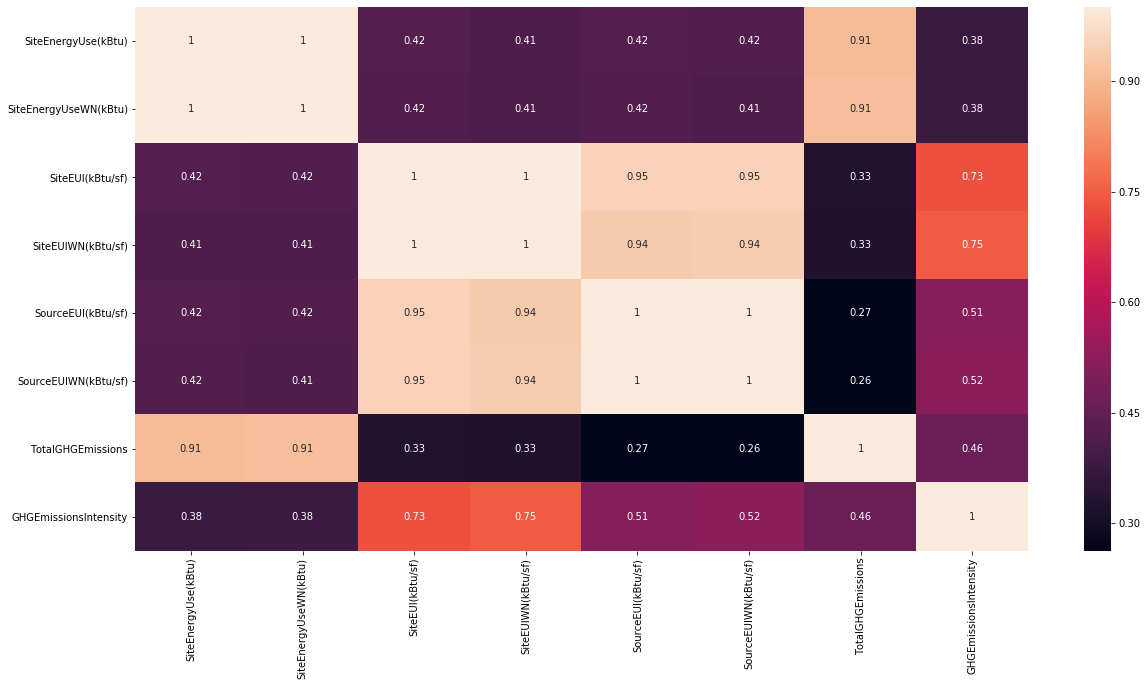

In [10]:
# visualiser la corrélation des features de résultats
# on construit la heatmap, avec une corrélation de pearson
plt.figure(figsize=(20, 10))
ax = sns.heatmap(dat[Outputs].corr(method='pearson'), annot=True)
plt.yticks(rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

on confirme en premier lieu des observations métiers qualitatives <br/>

- les séries WN confirment la corrélation avec les données non corrigées. Il s'agit d'une normalisation météo et ne seraient à privilégier que pour éviter l'influence de climats différents. Etants homogènes sur la zone géographique considérée : on choisit de ne pas les exploiter. <br/>

les observations additionnelles sont : <br/>

- émission et consommations sont respectivement corrélées en quantité totale et en intensité : la corrélation est meilleure en quantité totale qu'en intensité. <br/>

In [11]:
# retirer les séries WN
Drop = ['SiteEnergyUseWN(kBtu)',
        'SiteEUIWN(kBtu/sf)',
        'SourceEUIWN(kBtu/sf)']
dat.drop(Drop, axis=1, inplace=True)

- On décide de tester si une variable SourceEU (donc sans le "I"), présente un meilleur compromis : elle est accessible en utilisant le ratio SiteEU/SiteEUI.

In [12]:
# ajouter une  'SourceEU(kBtu)'
dat['SourceEU(kBtu)'] = dat['SourceEUI(kBtu/sf)']*(dat['SiteEnergyUse(kBtu)']/dat['SiteEUI(kBtu/sf)']).values

(6.0, 0.0)

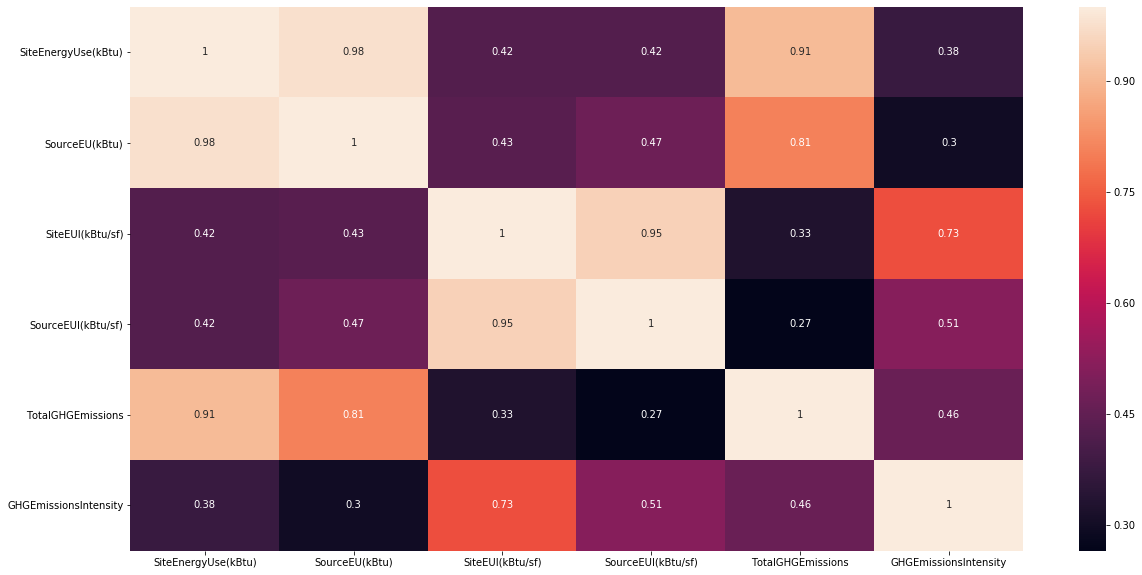

In [13]:
# ajouter dans 'Outputs'
Outputs = ['SiteEnergyUse(kBtu)',
           'SourceEU(kBtu)',
           'SiteEUI(kBtu/sf)',
           'SourceEUI(kBtu/sf)',
           'TotalGHGEmissions',
           'GHGEmissionsIntensity']
# produire la nouvelle heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(dat[Outputs].corr(method='pearson'), annot=True)
plt.yticks(rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- pari gagné :  une SourceEU est mieux corrélée au TotalGHGEmissions, dans l'état d'esprit de l'objectif visé.

- toutefois, si cela présente une meilleure corrélation que les intensités cela n'arrive pas au niveau de corrélation entre SiteEU et TotalGHGEmissions.

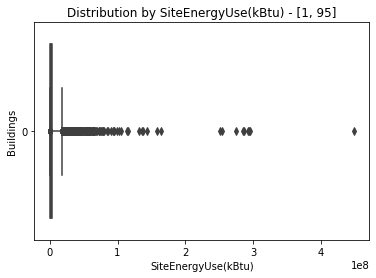

Il y a 100 pourcent(s) des données disponibles, soit 6499 données


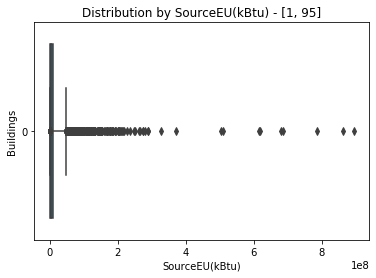

Il y a 100 pourcent(s) des données disponibles, soit 6499 données


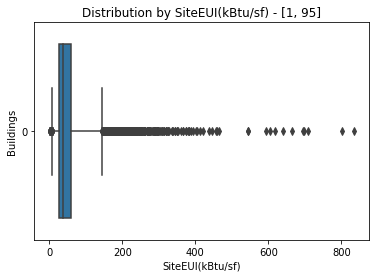

Il y a 100 pourcent(s) des données disponibles, soit 6499 données


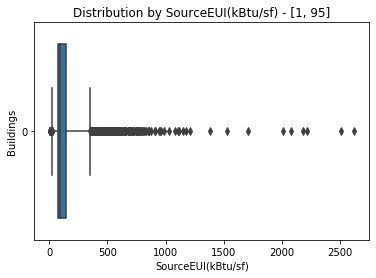

Il y a 100 pourcent(s) des données disponibles, soit 6499 données


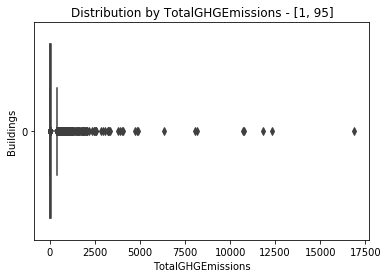

Il y a 100 pourcent(s) des données disponibles, soit 6499 données


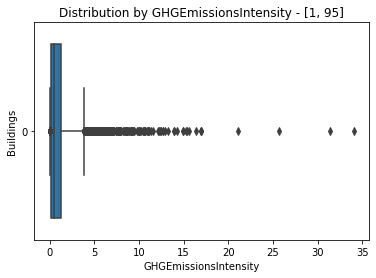

Il y a 100 pourcent(s) des données disponibles, soit 6499 données


In [14]:
# observer la distribution des résultats "bruts" (outputs)
for i in Outputs:
    sns.boxplot(data=dat[i], whis=[1, 95], orient="h")
    plt.title('Distribution by %s - [1, 95]' % str(i))
    plt.xlabel(i)
    plt.ylabel('Buildings')
    plt.show()
    print('Il y a %d pourcent(s) des données disponibles, soit %d données' % (round(100*((dat.shape[0]-dat[i].isna().sum())/dat.shape[0]), 2), (dat.shape[0]-dat[i].isna().sum())))

- Les features de résultats sont très écartés d'une distribution normale. 
- Dans la perspective d'un apprentissage, et plus particulièrement pour la validité d'une régression linéaire, on peut remédier à cette distribution en passant au log la variable.
- Les intensités d'énergie sont globalement bien mieux distribuées que les valeurs totales.

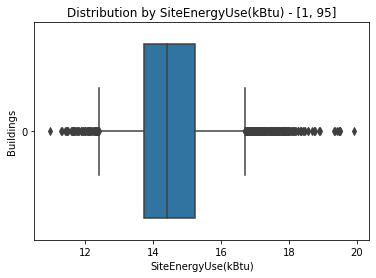

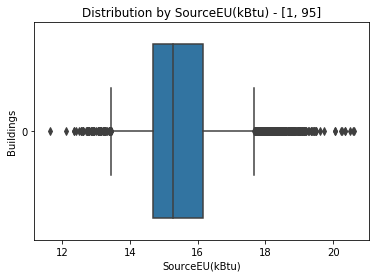

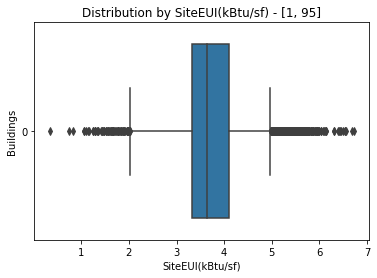

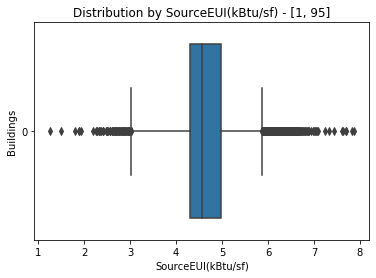

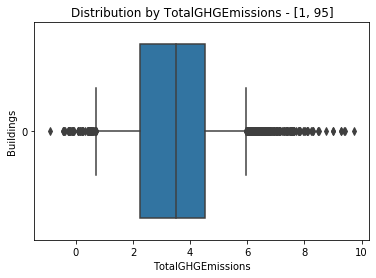

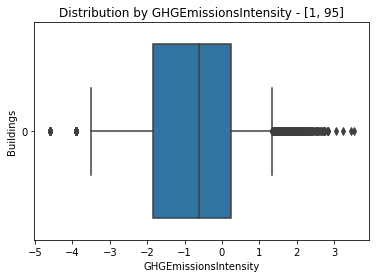

In [15]:
# observer la distribution des résultats passés au log (outputs)
for i in Outputs:
    sns.boxplot(data=np.log(dat[i]), whis=[1, 95], orient="h")
    plt.title('Distribution by %s - [1, 95]' % str(i))
    plt.xlabel(i)
    plt.ylabel('Buildings')
    plt.show()

In [16]:
# observer l'effet des cuts d'outliers (percentile)
datcut = dat
init = 0
cut = 0
cumulcut = 0
for i in Outputs:
    print(i)
    init = datcut.shape[0]
    datcut = datcut[datcut[i] <= datcut[i].quantile(0.99)]
    datcut = datcut[datcut[i] >= datcut[i].quantile(0.01)]
    cut = init - datcut.shape[0]
    cumulcut = cumulcut + cut
    print('nb items retirés %i' % cut)
    print('cumul %i' % cumulcut)

SiteEnergyUse(kBtu)
nb items retirés 130
cumul 130
SourceEU(kBtu)
nb items retirés 128
cumul 258
SiteEUI(kBtu/sf)
nb items retirés 125
cumul 383
SourceEUI(kBtu/sf)
nb items retirés 122
cumul 505
TotalGHGEmissions
nb items retirés 120
cumul 625
GHGEmissionsIntensity
nb items retirés 103
cumul 728


- on observe que la suppression des outliers conduit à supprimer un nombre équivalent de données à chaque étape ! c'est assez contre-intuitif car on aurait imaginé, surtout au vu des corrélations, qu'il y aurait plus de bâtiments outliers au sens de plusieurs features. <br/>
- il faudrait appliquer le retrait d'outliers de manière ciblée en fonction de résultats selectionnés, afin de se prémunir d'une coupe trop forte dans les données, voire évaluer l'impact de ce retrait d'outlier dans les modèles.
- il y a sûrement des facteurs externes qui justifient que chaque feature a son lot d'outliers au sens statistique. 

- on décide d'observer l'effet de cette coupe d'outliers sur les corrélations entre les features de résultats.

(6.0, 0.0)

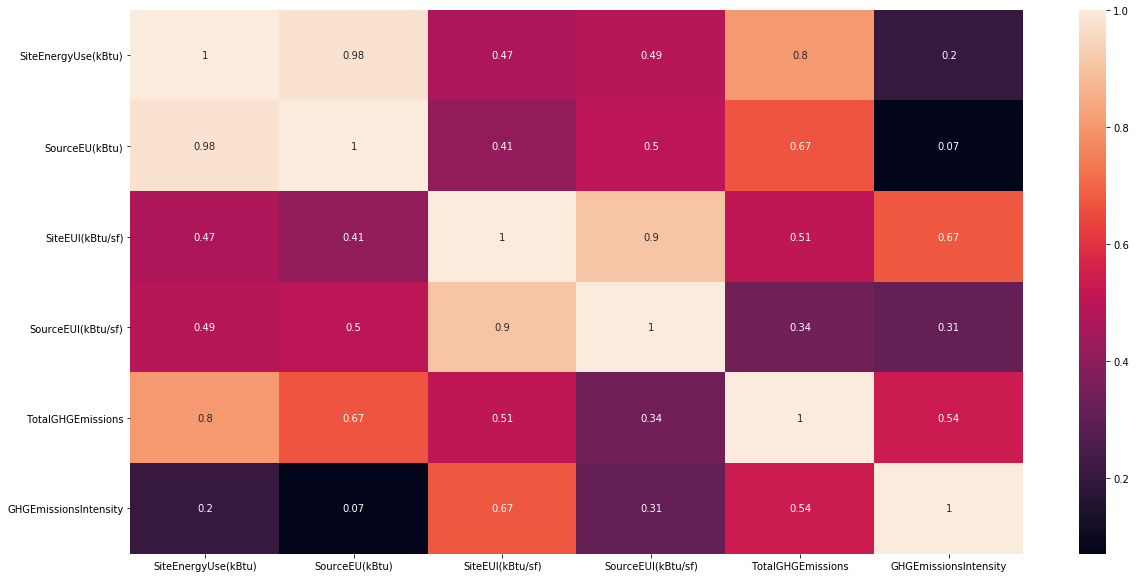

In [17]:
# observer l'effet du cut sur les corrélations : on compare avec la heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(datcut[Outputs].corr(method='pearson'), annot=True)
plt.yticks(rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [18]:
# calculer l'écart des corrélations avant et après retrait des outliers
deltacorr = datcut[Outputs].corr(method='pearson') - dat[Outputs].corr(method='pearson')
deltacorr.round(2)

,SiteEnergyUse(kBtu),SourceEU(kBtu),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
SiteEnergyUse(kBtu),0.00,0.00,0.04,0.06,-0.10,-0.17
SourceEU(kBtu),0.00,0.00,-0.02,0.03,-0.14,-0.23
SiteEUI(kBtu/sf),0.04,-0.02,0.00,-0.05,0.18,-0.06
SourceEUI(kBtu/sf),0.06,0.03,-0.05,0.00,0.07,-0.20
TotalGHGEmissions,-0.10,-0.14,0.18,0.07,0.00,0.07
GHGEmissionsIntensity,-0.17,-0.23,-0.06,-0.20,0.07,0.00


2:80: E501 line too long (88 > 79 characters)


- on ne relève que des dégradations à l'exception d'une amélioration pour TotalGHGEmissions vs SiteEUI (et dans une moindre mesure SourceEUI, croisant un total et une intensité.

In [19]:
# on va tester d'éliminer les outliers uniquement pour les cibles retenues
# et dans une proportion paramétrable


def removeOutliers(df, targets, percent):
    init = 0
    cut = 0
    cumulcut = 0
    for i in targets:
        print(i)
        init = df.shape[0]
        df = df[df[i] <= df[i].quantile(1 - percent)]
        df = df[df[i] >= df[i].quantile(percent)]
        cut = init - df.shape[0]
        cumulcut = cumulcut + cut
        print('nb items retirés %i' % cut)
        print('cumul %i' % cumulcut)
        print(df.shape[0])


In [20]:
# tester d'application de la fonction removeOutliers
removeOutliers(dat, ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], 0.01)

SiteEnergyUse(kBtu)
nb items retirés 130
cumul 130
6369
TotalGHGEmissions
nb items retirés 128
cumul 258
6241


In [21]:
# retirer les outliers des "totaux"
datTot = dat
for i in ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']:
    datTot = datTot[datTot[i] <= datTot[i].quantile(0.99)]
    datTot = datTot[datTot[i] >= datTot[i].quantile(0.01)]
    print(datTot.shape)

(6369, 46)
(6241, 46)


In [22]:
# retirer les outliers des "intensité"
datI = dat
for i in ['SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity']:
    datI = datI[datI[i] <= datI[i].quantile(0.99)]
    datI = datI[datI[i] >= datI[i].quantile(0.01)]
    print(datI.shape)

(6369, 46)
(6212, 46)


In [23]:
# écarts de corrélations en cas de retrait des outliers intensités
datI[Outputs].corr(method='pearson').round(2) - dat[Outputs].corr(method='pearson').round(2)

,SiteEnergyUse(kBtu),SourceEU(kBtu),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
SiteEnergyUse(kBtu),0.00,0.00,-0.03,-0.03,-0.03,-0.13
SourceEU(kBtu),0.00,0.00,-0.06,-0.07,-0.03,-0.13
SiteEUI(kBtu/sf),-0.03,-0.06,0.00,-0.02,0.03,-0.03
SourceEUI(kBtu/sf),-0.03,-0.07,-0.02,0.00,0.01,-0.10
TotalGHGEmissions,-0.03,-0.03,0.03,0.01,0.00,-0.07
GHGEmissionsIntensity,-0.13,-0.13,-0.03,-0.10,-0.07,0.00


In [24]:
# écarts de corrélations en cas de retrait des outliers totaux
datTot[Outputs].corr(method='pearson').round(2) - dat[Outputs].corr(method='pearson').round(2)

,SiteEnergyUse(kBtu),SourceEU(kBtu),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
SiteEnergyUse(kBtu),0.00,0.00,0.03,0.06,-0.12,-0.14
SourceEU(kBtu),0.00,0.00,-0.04,-0.01,-0.14,-0.17
SiteEUI(kBtu/sf),0.03,-0.04,0.00,-0.01,0.18,0.02
SourceEUI(kBtu/sf),0.06,-0.01,-0.01,0.00,0.14,0.01
TotalGHGEmissions,-0.12,-0.14,0.18,0.14,0.00,0.10
GHGEmissionsIntensity,-0.14,-0.17,0.02,0.01,0.10,0.00


- on améliore un peu la corrélation entre intensités d'émission et d'énergie. Cela fait apparaitre de ce point de vue un candidat alternatif (intensité d'énergie - total d'émissions).

In [25]:
# calculer l'écart de corrélation après passage au log
np.log(dat[Outputs]).corr(method='pearson').round(2) - dat[Outputs].corr(method='pearson').round(2)

,SiteEnergyUse(kBtu),SourceEU(kBtu),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
SiteEnergyUse(kBtu),0.00,0.00,0.29,0.26,-0.02,0.14
SourceEU(kBtu),0.00,0.00,0.22,0.23,-0.03,0.05
SiteEUI(kBtu/sf),0.29,0.22,0.00,-0.02,0.38,-0.02
SourceEUI(kBtu/sf),0.26,0.23,-0.02,0.00,0.25,-0.06
TotalGHGEmissions,-0.02,-0.03,0.38,0.25,0.00,0.34
GHGEmissionsIntensity,0.14,0.05,-0.02,-0.06,0.34,0.00


- la corrélation est dégradée par le retrait d'outliers.
- la meilleure corrélation reste en valeurs totales et on ne parvient qu'à compenser très faiblement la moins bonne corrélation sur les intensités.
- dans cette approche où on propose de remédier à l'étalement des distributions via le passage au log de la donnée, les corrélations sont affectées

C:\Users\etien\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


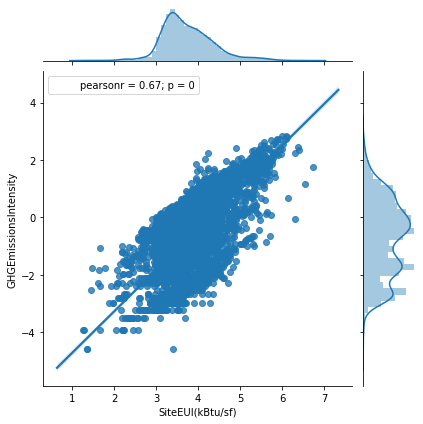

In [26]:
# visualiser la corrélation entre les 2 intensités
j = sns.jointplot(np.log(datTot['SiteEUI(kBtu/sf)']),
                  np.log(datTot['GHGEmissionsIntensity']),
                  data=dat,
                  kind='reg')
j.annotate(stats.pearsonr)

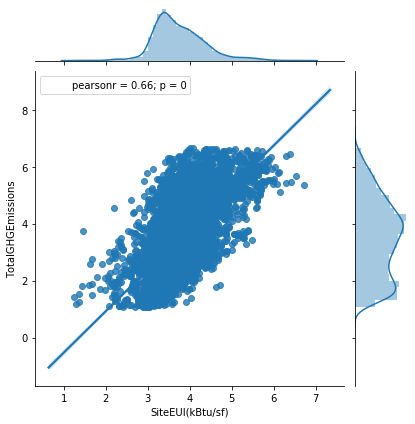

In [27]:
# visualiser la corrélation entre intensité d'énergie et Emissions totales
j = sns.jointplot(np.log(datTot['SiteEUI(kBtu/sf)']),
                  np.log(datTot['TotalGHGEmissions']),
                  data=dat,
                  kind='reg')
j.annotate(stats.pearsonr)

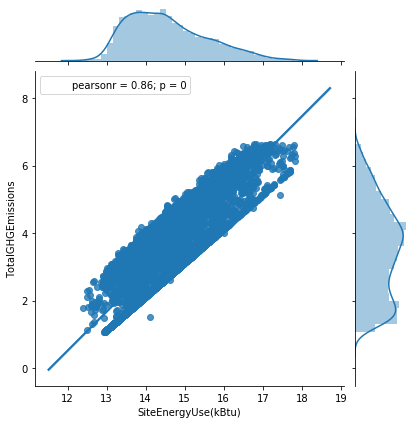

In [28]:
# visualiser la corrélation entre les deux totaux
j = sns.jointplot(np.log(datTot['SiteEnergyUse(kBtu)']),
                  np.log(datTot['TotalGHGEmissions']),
                  data=dat,
                  kind='reg')
j.annotate(stats.pearsonr)

### B.1.2. Composition de l'énergie consommée

In [29]:
# lister les constituants de l'énergie
Compo = ['Electricity(kBtu)',
         'NaturalGas(kBtu)',
         'OtherFuelUse(kBtu)',
         'SteamUse(kBtu)']

In [30]:
# tester d'application de la fonction removeOutliers
removeOutliers(dat, Compo, 0.01)

Electricity(kBtu)
nb items retirés 130
cumul 130
6369
NaturalGas(kBtu)
nb items retirés 64
cumul 194
6305
OtherFuelUse(kBtu)
nb items retirés 12
cumul 206
6293
SteamUse(kBtu)
nb items retirés 63
cumul 269
6230


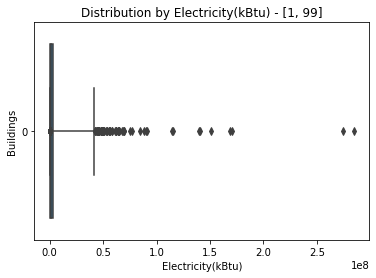

Il y a 100 pourcent(s) des données disponibles, soit 6499 données


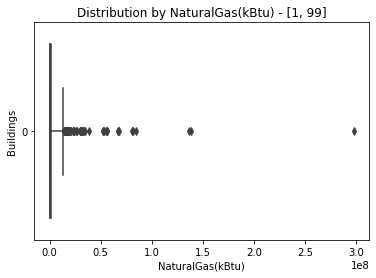

Il y a 100 pourcent(s) des données disponibles, soit 6499 données


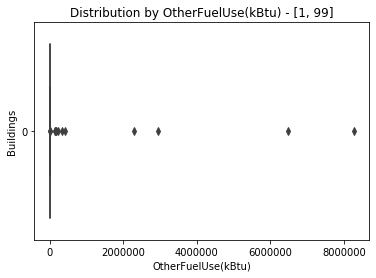

Il y a 100 pourcent(s) des données disponibles, soit 6499 données


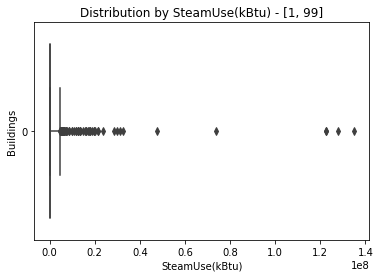

Il y a 100 pourcent(s) des données disponibles, soit 6499 données


In [31]:
# observer la distribution des composantes d'energie consommée
for i in Compo:
    sns.boxplot(data=dat[i], whis=[1, 99], orient="h")
    plt.title('Distribution by %s - [1, 99]' % str(i))
    plt.xlabel(i)
    plt.ylabel('Buildings')
    plt.show()
    print('Il y a %d pourcent(s) des données disponibles, soit %d données' % (round(100*((dat.shape[0]-dat[i].isna().sum())/dat.shape[0]), 2), (dat.shape[0]-dat[i].isna().sum())))

In [32]:
# ajouter un total recalculé
dat['TotalEU(kBtu)'] = dat['Electricity(kBtu)']+dat['NaturalGas(kBtu)']+dat['OtherFuelUse(kBtu)']+dat['SteamUse(kBtu)']

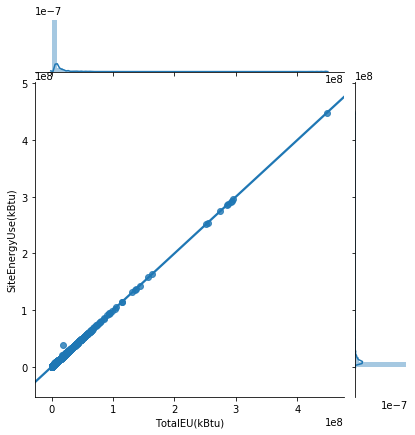

In [33]:
# visualiser le pairplot valeur recalculée sur total affiché
sns.jointplot(dat['TotalEU(kBtu)'],
              dat['SiteEnergyUse(kBtu)'],
              data=dat,
              kind='reg')

- sans nécessiter de relevé précis, une hypothèse serait de considérer comme faisant partie du profil la présence / absence des différentes sources d'énergie. on pourra alors proposer une codification (plus simple que la composition des surfaces), indiquant cette information. 


In [34]:
# coder en 0 absent / 1 présent

def code(val):
    if (val > 0):
        return 1
    else:
        return 0


# appliquer aux relevés par nature d'énergie consommée
dat['N_D_hasElectricity'] = dat['Electricity(kBtu)'].apply(code)
dat['N_D_hasNaturalGas'] = dat['NaturalGas(kBtu)'].apply(code)
dat['N_D_hasOtherFuel'] = dat['OtherFuelUse(kBtu)'].apply(code)
dat['N_D_hasSteam'] = dat['SteamUse(kBtu)'].apply(code)

In [35]:
# décompter les bâtiments par nature d'énergie utilisée
hasNature = ['N_D_hasElectricity',
             'N_D_hasNaturalGas',
             'N_D_hasOtherFuel',
             'N_D_hasSteam']
for i in hasNature:
    print('il y a '
          + str(dat[dat[i] == 1].shape[0])
          + ' bâtiments avec '
          + i
          + ' et '
          + str(dat.shape[0] - dat[dat[i] == 1].shape[0])
          + ' sans.')

il y a 6498 bâtiments avec N_D_hasElectricity et 1 sans.
il y a 4072 bâtiments avec N_D_hasNaturalGas et 2427 sans.
il y a 13 bâtiments avec N_D_hasOtherFuel et 6486 sans.
il y a 254 bâtiments avec N_D_hasSteam et 6245 sans.


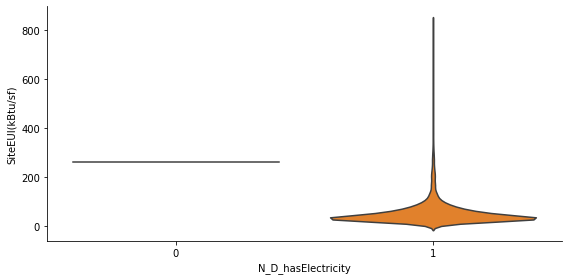

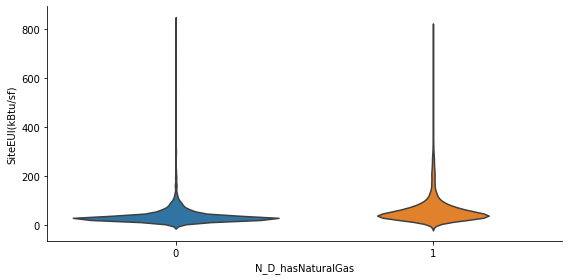

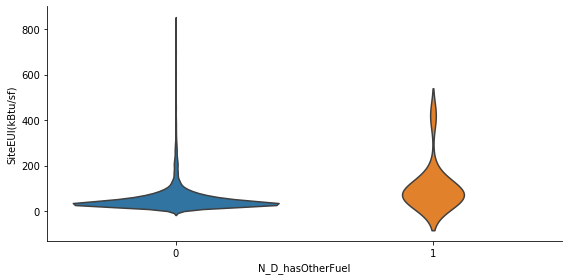

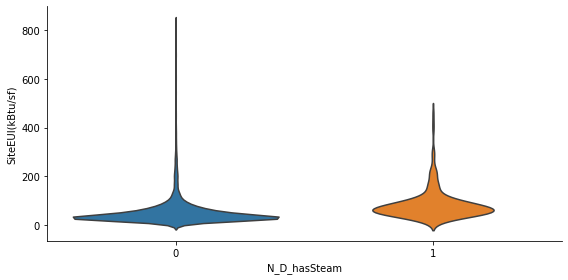

In [36]:
# observer les différences de distributions SiteEUI pour ces 4 nature
for i in hasNature:
    ax = sns.catplot(x=i,
                     y='SiteEUI(kBtu/sf)',
                     kind='violin',
                     inner=None,
                     data=dat,
                     height=4,
                     aspect=4/2)
    plt.xticks(rotation=0)
    plt.show()

In [37]:
# retirer les des cas avec OtherFuel et sans Electricity
# (factultatif : N_hasSteam)
dat = dat[dat['N_D_hasOtherFuel'] == 0]
dat = dat[dat['N_D_hasElectricity'] == 1]
# dat = dat[dat['N_hasSteam'] == 0]
# contrôler la taille des données
dat.shape

(6485, 51)

- on a créé une information de profil supplémentaire via 2 features 'N_D_hasNaturalGas' et 'N_D_hasSteam', dont on testera l'effet sur les modélisations.

### B.1.3. ENERGYSTARScore

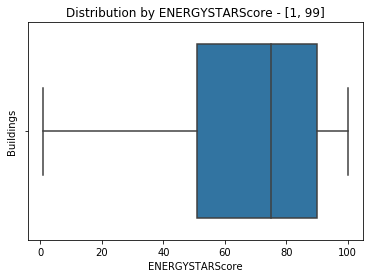

Il y a 76 pourcent(s) des données disponibles, soit 4930 données


In [38]:
# observer l'ENERGYSTARScore
sns.boxplot(dat['ENERGYSTARScore'].dropna(), whis=[1, 99], orient="h")
plt.title('Distribution by ENERGYSTARScore - [1, 99]')
plt.xlabel('ENERGYSTARScore')
plt.ylabel('Buildings')
plt.show()
print('Il y a %d pourcent(s) des données disponibles, soit %d données'
      % (round(100*((dat.shape[0]
                     - dat['ENERGYSTARScore'].isna().sum()) / dat.shape[0]),
               2),
         (dat.shape[0] - dat['ENERGYSTARScore'].isna().sum())))

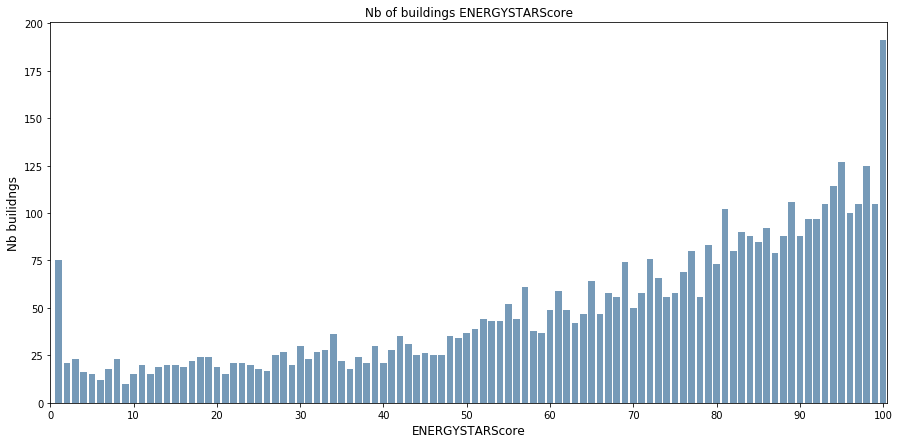

In [39]:
# visualiser la répartition des valeurs d'ENERGYSTARScore
cnt = dat['ENERGYSTARScore'].value_counts().sort_index(axis=0, ascending=True)
plt.figure(figsize=(15, 7))
sns.barplot(cnt.index, cnt.values, color='steelblue', alpha=0.8)
plt.xticks(np.arange(-1, 101, 10), labels=np.arange(0, 101, 10))
plt.title('Nb of buildings ENERGYSTARScore')
plt.ylabel('Nb builidngs', fontsize=12)
plt.xlabel('ENERGYSTARScore', fontsize=12)
plt.show()

In [40]:
# compter combien de valeurs sont indisponibles
dat['ENERGYSTARScore'].isna().sum()

1555

- une piste serait d'alimenter l'ENERGYSTARScore non disponible sur une année, par celui de l'autre relevé (si disponible). 

C:\Users\etien\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


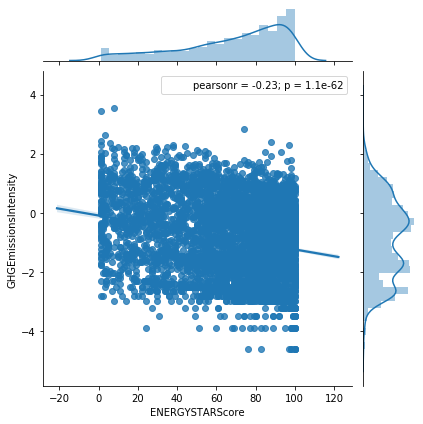

In [41]:
# observer le pairplot ENERGYSTARScore avec l'intensité d'émissions
j = sns.jointplot(dat['ENERGYSTARScore'],
                  np.log(dat['GHGEmissionsIntensity']),
                  data=dat,
                  kind='reg')
j.annotate(stats.pearsonr)

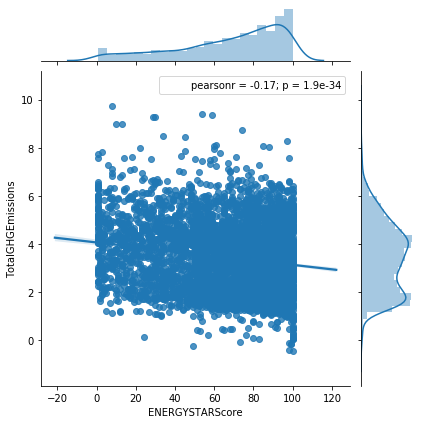

In [42]:
# observer le pairplot ENERGYSTARScore avec le total des émissions
j = sns.jointplot(dat['ENERGYSTARScore'],
                  np.log(dat['TotalGHGEmissions']),
                  data=dat,
                  kind='reg')
j.annotate(stats.pearsonr)

- l'ENERGYSTARScore est corrélé négativement avec l'intensité d'émission CO2 et le total d'émission. 

### B.1.4. Conclusion sur les features de résultats

Piste retenue : <br/> 
- travailler en Site plutôt que Source, pour privilégier les caractéristiques intrinsèques des bâtiments.<br/> 
Piste nécessitant des analyses complémentaires : <br/> 
- observer les corrélations des features avec les résultats en intensité ou en total, car les meilleurs niveaux de corrélations entre résultats sont favorables au binome energieémissions totales et non en intensité

In [43]:
# retirer les features inutiles
Drop = ['SourceEU(kBtu)',
        'SourceEUI(kBtu/sf)',
        'Electricity(kBtu)',
        'Electricity(kWh)',
        'NaturalGas(kBtu)',
        'NaturalGas(therms)',
        'OtherFuelUse(kBtu)',
        'SteamUse(kBtu)',
        'TotalEU(kBtu)',
        'N_D_hasOtherFuel',
        'N_D_hasElectricity']
dat.drop(Drop, axis=1, inplace=True)

In [44]:
# exporter du dataframe
dat.to_csv('dat2.csv', index=False)

In [45]:
# contrôler la taille des données
dat.shape

(6485, 40)